importing dependencies

In [2]:
import pandas as pd
import numpy as np
import re  #regular expression lib
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sb
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

creating a single usable dataframe using pandas

In [6]:
dataset_1=pd.read_csv('/content/news_dataset.csv')
dataset_2=pd.read_csv('/content/train.csv')
dataset_1['label']=dataset_1['label'].replace({'FAKE':1,'REAL':0})
dataset_2['text']=dataset_2['author']+' '+dataset_2['title']
dataset_2.drop(columns='id',axis=1,inplace=True)
dataset_2.drop(columns='author',axis=1,inplace=True)
dataset_2.drop(columns='title',axis=1,inplace=True)
dataset_1=dataset_1[['text','label']]
dataset=pd.concat([dataset_1,dataset_2],axis=0,ignore_index=True)
dataset.shape

(24529, 2)

distribution of fake ,real data in dataset: 0:Real 1:Fake

<Axes: xlabel='label', ylabel='count'>

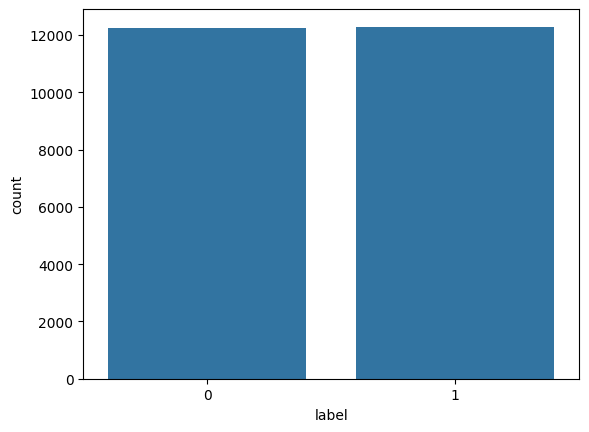

In [ ]:
sb.countplot(x='label',data=dataset)

In [7]:
dataset=dataset.fillna(' ')

In [ ]:
port_stem=PorterStemmer()
def stemming(text):
   stemmed_text=re.sub('[^a-zA-Z]',' ',text) #replaces all the characters not belonging in set(a-z,A-Z) like 1,2,@,! etc by ' '
   stemmed_text=stemmed_text.lower() #converting to lower alphabets
   stemmed_text=stemmed_text.split() #splitting each word to list
   stemmed_text=[port_stem.stem(word) for word in stemmed_text if not word in stopwords.words('english')] #stems each word which is not present in stopwords
   stemmed_text=' '.join(stemmed_text)
   return stemmed_text                     #joins and return the words

In [ ]:
dataset['text']=dataset['text'].apply(stemming)

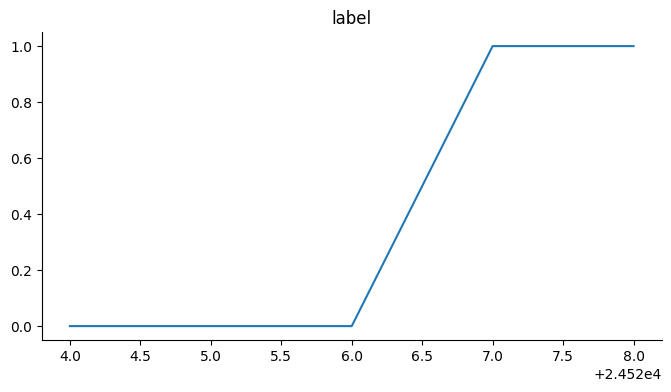

In [ ]:
from matplotlib import pyplot as plt
_df_3['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

seperating labels and features

In [8]:
X=dataset['text'].values
Y=dataset['label'].values

**converting the textual data to numerical features using Tf-idf vectorizer**

In [9]:
vectorizer=TfidfVectorizer()
vectorizer.fit_transform(X)
X=vectorizer.transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2) #stratify is used to perform balanced distribution
                                                                                                  #random_state is used to decide the way of splitting data,different random_state will produce different results

**Training Models**
1)logistics regression

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
X_train_score=model.predict(X_train)
score_accu_train=accuracy_score(X_train_score,Y_train)
print("The train data accuracy score is ",score_accu_train*100)

The train data accuracy score is  98.68521632777862


In [ ]:
X_test_score=model.predict(X_test)
score_accu_test=accuracy_score(X_test_score,Y_test)
print("The test data accuracy score is ",score_accu_test*100)

The test data accuracy score is  97.92091316754994


2) Xgboost model

In [ ]:
model2 = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',        # Evaluation metric
    use_label_encoder=False       # To suppress warning
)

# Train the model
model2.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:49:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
score=model2.predict(X_train)
accu_score=accuracy_score(score,Y_train)
print("the train data score is: ",accu_score*100)

the train data score is:  99.25597513122356


In [ ]:
score=model2.predict(X_test)
accu_score=accuracy_score(score,Y_test)
print("the test data score is: ",accu_score*100)

the test data score is:  98.7362413371382


3) Naive_bayes model

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
score3=nb_model.predict(X_train)
accu_score3=accuracy_score(score3,Y_train)
print("the train data score is: ",accu_score3*100)

the train data score is:  97.78321357590582


In [ ]:
score4=nb_model.predict(X_test)
accu_score4=accuracy_score(score4,Y_test)
print("the test data score is: ",accu_score4*100)

the test data score is:  96.35140644109254


**STATISTICS OF OUR MODEL AND DATA**

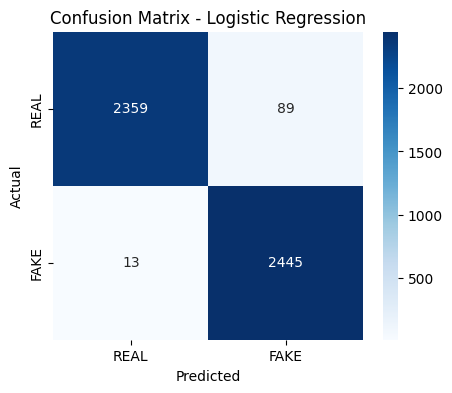

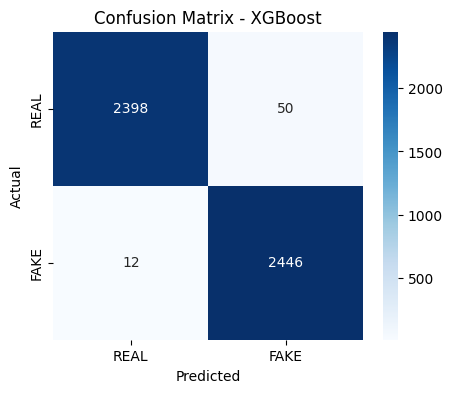

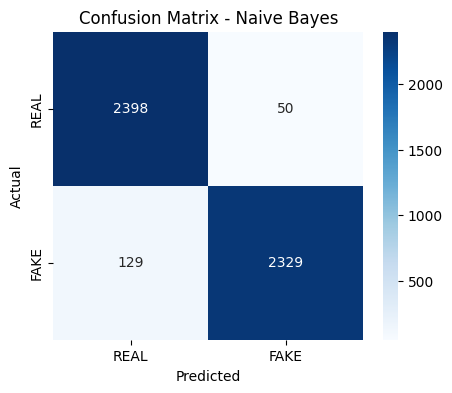

In [ ]:
# Import necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

# Confusion Matrix and Visualization function
def plot_confusion_matrix(model_name, Y_test, predictions):
    cm = confusion_matrix(Y_test, predictions)
    plt.figure(figsize=(5, 4))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['REAL', 'FAKE'], yticklabels=['REAL', 'FAKE'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Predictions for Logistic Regression
X_test_score_lr = model.predict(X_test)
plot_confusion_matrix("Logistic Regression", Y_test, X_test_score_lr)

# Predictions for XGBoost
X_test_score_xgb = model2.predict(X_test)
plot_confusion_matrix("XGBoost", Y_test, X_test_score_xgb)

# Predictions for Naive Bayes
X_test_score_nb = nb_model.predict(X_test)
plot_confusion_matrix("Naive Bayes", Y_test, X_test_score_nb)


Accuracy comparison BAR PLOT

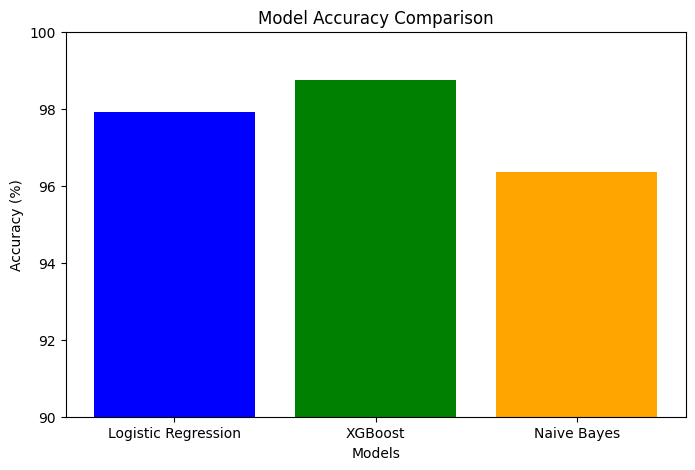

In [ ]:
import matplotlib.pyplot as plt

# Accuracies from the models
lr_accuracy = score_accu_test * 100  # Logistic Regression
xgb_accuracy = accu_score * 100      # XGBoost
nb_accuracy = accu_score4 * 100      # Naive Bayes

# Model names and their respective accuracies
models = ['Logistic Regression', 'XGBoost', 'Naive Bayes']
accuracies = [lr_accuracy, xgb_accuracy, nb_accuracy]

# Plotting the accuracies
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(90, 100)  # Optional: Adjust the y-axis range for better visualization
plt.show()



learning curve bar plot

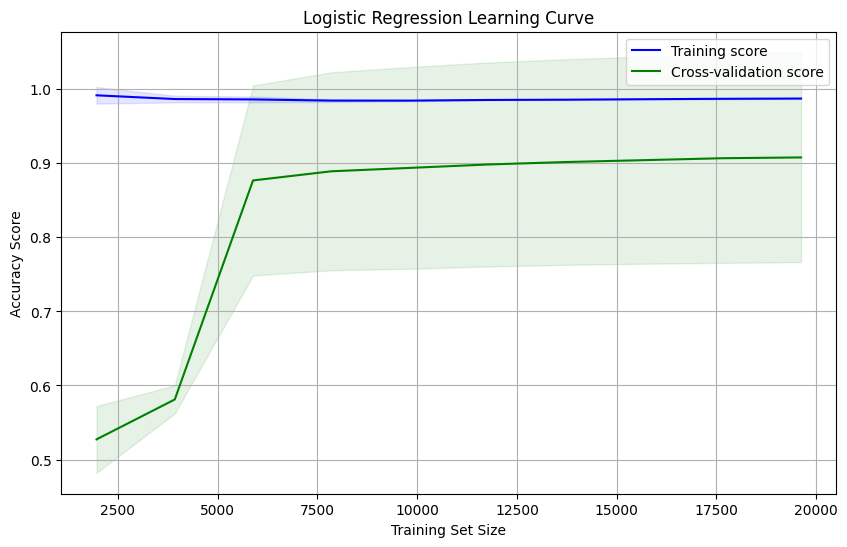

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, Y, title="Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=5, scoring='accuracy',
                                                            n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training score", color="blue")
    plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.1)

    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plot learning curve for Logistic Regression
plot_learning_curve(model, X, Y, title="Logistic Regression Learning Curve")


In [ ]:
!pip install plotly

interactive accuracy bar plot

In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score

# Calculate accuracies for each model (make sure these models have been trained)
log_reg_accuracy = accuracy_score(model.predict(X_test), Y_test)
xgb_accuracy = accuracy_score(model2.predict(X_test), Y_test)
nb_accuracy = accuracy_score(nb_model.predict(X_test), Y_test)

# Create an interactive bar plot
fig = go.Figure(data=[
    go.Bar(name='Logistic Regression', x=['Logistic Regression'], y=[log_reg_accuracy * 100]),
    go.Bar(name='XGBoost', x=['XGBoost'], y=[xgb_accuracy * 100]),
    go.Bar(name='Naive Bayes', x=['Naive Bayes'], y=[nb_accuracy * 100])
])

# Update layout for the bar plot
fig.update_layout(
    title='Model Accuracy Comparison',
    xaxis_title='Models',
    yaxis_title='Accuracy (%)',
    barmode='group'
)

# Show the plot
fig.show()


interactive confusion matrix

In [ ]:
import plotly.express as px
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
cm_log_reg = confusion_matrix(Y_test, model.predict(X_test))
cm_xgb = confusion_matrix(Y_test, model2.predict(X_test))
cm_nb = confusion_matrix(Y_test, nb_model.predict(X_test))

# Create a DataFrame for Plotly
cm_df_log_reg = pd.DataFrame(cm_log_reg, index=['REAL', 'FAKE'], columns=['REAL', 'FAKE'])
cm_df_xgb = pd.DataFrame(cm_xgb, index=['REAL', 'FAKE'], columns=['REAL', 'FAKE'])
cm_df_nb = pd.DataFrame(cm_nb, index=['REAL', 'FAKE'], columns=['REAL', 'FAKE'])

fig_log_reg = px.imshow(cm_df_log_reg, text_auto=True, color_continuous_scale='Blues', title='Confusion Matrix: Logistic Regression')
fig_xgb = px.imshow(cm_df_xgb, text_auto=True, color_continuous_scale='Blues', title='Confusion Matrix: XGBoost')
fig_nb = px.imshow(cm_df_nb, text_auto=True, color_continuous_scale='Blues', title='Confusion Matrix: Naive Bayes')

# Show the plots
fig_log_reg.show()
fig_xgb.show()
fig_nb.show()


Interactive ROC curves

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and ROC area for each model
fpr_log_reg, tpr_log_reg, _ = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, model2.predict_proba(X_test)[:,1])
fpr_nb, tpr_nb, _ = roc_curve(Y_test, nb_model.predict_proba(X_test)[:,1])

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr_log_reg, y=tpr_log_reg, mode='lines', name='Logistic Regression'))
fig_roc.add_trace(go.Scatter(x=fpr_xgb, y=tpr_xgb, mode='lines', name='XGBoost'))
fig_roc.add_trace(go.Scatter(x=fpr_nb, y=tpr_nb, mode='lines', name='Naive Bayes'))

fig_roc.update_layout(
    title='ROC Curve Comparison',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    showlegend=True
)

fig_roc.show()


Feature importance plot for XGBoost

In [ ]:
import plotly.express as px

# Feature importances from XGBoost
feature_importances = model2.feature_importances_
features = vectorizer.get_feature_names_out()

# Create DataFrame for Plotly
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

fig_importance = px.bar(importance_df.head(20), x='Feature', y='Importance', title='Top 20 Feature Importances')
fig_importance.update_xaxes(tickangle=45)

fig_importance.show()


prediction distribution interactive

In [ ]:
# Create a DataFrame for Plotly
pred_df = pd.DataFrame({
    'True Label': Y_test,
    'Logistic Regression': model.predict(X_test),
    'XGBoost': model2.predict(X_test),
    'Naive Bayes': nb_model.predict(X_test)
})

fig_pred_dist = px.histogram(pred_df, x='Logistic Regression', color='True Label', title='Distribution of Logistic Regression Predictions')
fig_pred_dist.show()

fig_pred_dist_xgb = px.histogram(pred_df, x='XGBoost', color='True Label', title='Distribution of XGBoost Predictions')
fig_pred_dist_xgb.show()

fig_pred_dist_nb = px.histogram(pred_df, x='Naive Bayes', color='True Label', title='Distribution of Naive Bayes Predictions')
fig_pred_dist_nb.show()


word cloud

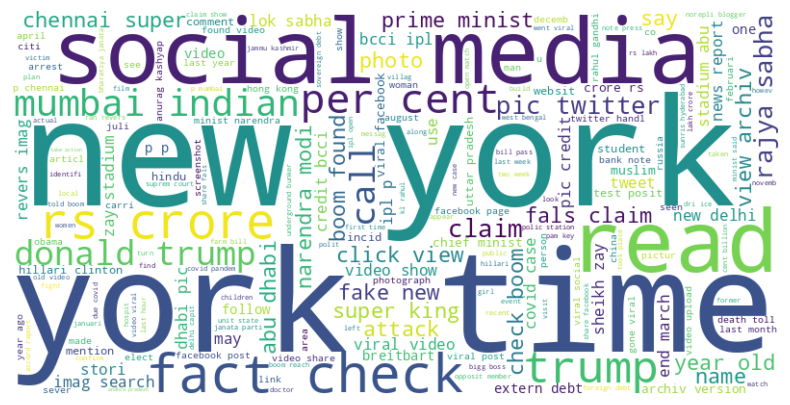

In [ ]:
from wordcloud import WordCloud

text = ' '.join(dataset['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


pie